In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [416]:
df = pd.read_excel('knn_data.xlsx')
df

,x1,x2,class
0,-6.005674,-4.854007,1
1,0.937182,-10.939275,1
2,8.158951,-7.719885,1
3,4.814693,-2.841937,1
4,-3.602122,-10.576468,1
...,...,...,...
95,-6.006420,-1.944295,1
96,8.083901,-3.041803,1
97,6.209541,1.918128,1
98,3.243569,-9.595519,0


In [417]:
df['class'].value_counts()

1    50
0    50
Name: class, dtype: int64

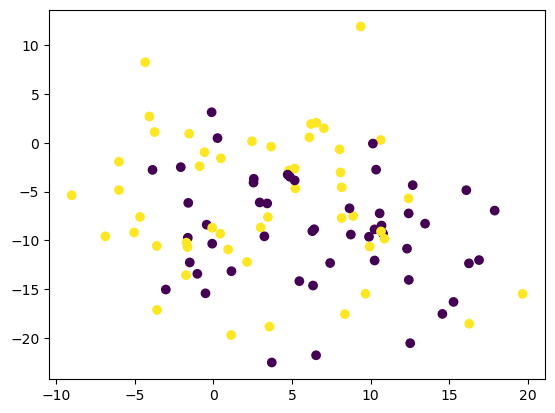

In [418]:
# 1
plt.scatter(df['x1'], df['x2'], c = df['class'])

In [419]:
X = df[['x1', 'x2']]
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [420]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

c:\Users\dms\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.65

In [421]:
# 2
def data_split(df, test_size=0.25):
    train_size = int(len(df)*(1 - test_size))
    df_sh = df.sample(frac=1)

    train_data = df_sh.iloc[:train_size,:]
    test_data = df_sh.iloc[train_size:,:]
    return train_data, test_data

train_data, test_data = data_split(df, 0.25)

In [422]:
def k_neighbors(train_data, test_object, k = 1):
    dists = []
    for i in range(len(train_data)):
        point1 = np.array(train_data.iloc[i])
        point2 = np.array(test_object)
        dists.append((np.linalg.norm(point1 - point2), train_data.iloc[i][-1]))
    dists_srt = sorted(dists)
    return dists_srt[:k]


def predict(neighbors):
    d = {}
    for n in neighbors:
        if n not in d:
            d[n] = 0
        d[n] += 1
    return max(d, key=d.get)[1]


def accuracy(test, test_pred):
    correct = 0
    for i in range(len(test)):
        if test.iloc[i][-1] == test_pred[i]:
            correct += 1
    return (correct / len(test))

In [423]:
preds = []
for i in range(len(test_data)):
    neighbors = k_neighbors(train_data, test_data.iloc[i], k = 2)
    preds.append(predict(neighbors))

accuracy = accuracy(test_data, preds)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.84
